# Preprocessing of Reviews Dataset - Airline and Airport


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read Data

In [1]:
# Unzip data folder
# !python3 -m zipfile -e ../../proposal_flight/skytrax.zip skytrax/

In [4]:
airline = pd.read_csv("skytrax/airline.csv")
airport = pd.read_csv("skytrax/airport.csv")

## Airline Reviews

In [6]:
airline.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


### 1. Data Type and Range


In [7]:
airline.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,36861.000000,33706.000000,33708.000000,33264.000000,31114.000000,2203.000000,565.000000,39723.000000,41396.000000
mean,6.039527,3.094612,3.319212,2.805886,2.392364,2.736723,2.249558,3.164111,0.533820
std,3.214680,1.405515,1.541307,1.580246,1.704753,1.569073,1.541283,1.523486,0.498861
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,7.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.000000,4.000000,1.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [14]:
airline.dtypes

airline_name                      object
link                              object
title                             object
author                            object
author_country                    object
date                              object
content                           object
aircraft                          object
type_traveller                    object
cabin_flown                       object
route                             object
overall_rating                   float64
seat_comfort_rating              float64
cabin_staff_rating               float64
food_beverages_rating            float64
inflight_entertainment_rating    float64
ground_service_rating            float64
wifi_connectivity_rating         float64
value_money_rating               float64
recommended                        int64
dtype: object

In [33]:
for col in airline.columns[8:]:
    print(col, ": ", airline[col].unique())

type_traveller :  [nan 'FamilyLeisure' 'Couple Leisure' 'Solo Leisure' 'Business']
cabin_flown :  ['Economy' 'Business Class' nan 'Premium Economy' 'First Class']
route :  [nan 'Athens to Larnaca' 'Athens to London' ...
 'Reykjavik to Berlin Schoenefeld' 'JFK to Paris' 'Miami to Paris']
overall_rating :  [ 7. 10.  9.  8.  4.  5.  6.  3. nan  2.  1.]
seat_comfort_rating :  [ 4.  5.  3.  2. nan  1.  0.]
cabin_staff_rating :  [ 4.  5.  2.  3. nan  1.  0.]
food_beverages_rating :  [ 4.  3.  1. nan  5.  2.  0.]
inflight_entertainment_rating :  [ 0.  1.  2.  3.  4. nan  5.]
ground_service_rating :  [nan  3.  4.  2.  5.  1.]
wifi_connectivity_rating :  [nan  2.  1.  5.  4.  3.]
value_money_rating :  [ 4.  5.  2.  3.  1. nan  0.]
recommended :  [1 0]


### 2. Percentage of Missing Values

In [61]:
airline_missing = pd.DataFrame(columns = ['Percentage Missing'], data = airline.apply(lambda x: (1-(x.count()/x.size))*100)).reset_index()
airline_missing['Percentage Missing'] = round(airline_missing['Percentage Missing'],2)
airline_missing

,index,Percentage Missing
0,airline_name,0.00
1,link,0.00
2,title,0.00
3,author,0.00
4,author_country,3.84
5,date,0.00
6,content,0.00
7,aircraft,96.91
8,type_traveller,94.26
9,cabin_flown,6.95


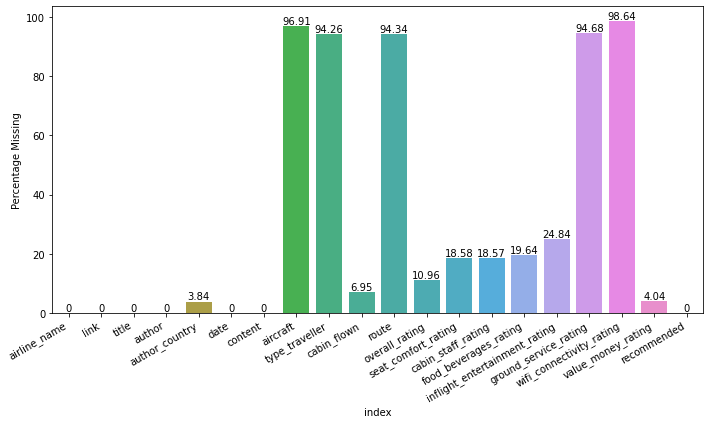

In [65]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="index", y="Percentage Missing", data = airline_missing)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30, horizontalalignment="right")
plt.tight_layout()

### 3. Remove unnecessary columns & high percentage of missing values

In [66]:
airline.columns

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')

In [67]:
airline = airline.drop(columns = ['link', 'title', 'author', 'author_country', 'content', 'aircraft', 'type_traveller', 'route', 
                                  'ground_service_rating', 'wifi_connectivity_rating', ]
                )

### 4. Missing values

In [73]:
airline

,airline_name,date,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
0,adria-airways,2015-04-10,Economy,7.0,4.0,4.0,4.0,0.0,4.0,1
1,adria-airways,2015-01-05,Business Class,10.0,4.0,5.0,4.0,1.0,5.0,1
2,adria-airways,2014-09-14,Economy,9.0,5.0,5.0,4.0,0.0,5.0,1
3,adria-airways,2014-09-06,Business Class,8.0,4.0,4.0,3.0,1.0,4.0,1
4,adria-airways,2014-06-16,Economy,4.0,4.0,2.0,1.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
41391,wizz-air,2010-07-15,Economy,NaN,NaN,NaN,NaN,NaN,1.0,0
41392,wizz-air,2010-06-23,Economy,8.0,NaN,NaN,NaN,NaN,4.0,1
41393,wizz-air,2010-06-19,Economy,NaN,NaN,NaN,NaN,NaN,1.0,0
41394,wizz-air,2010-06-16,Economy,5.0,NaN,NaN,NaN,NaN,4.0,1


**Drop rows with missing cabin_flown**

In [72]:
airline = airline.dropna(subset = ['cabin_flown'])

**Impute missing ratings with the mean value of each airline**

In [ ]:
for col in airline.columns[3:-1]:
    airline[col] = airline[col].fillna(airline.groupby('airline_name')[col].transform('mean'))
    

In [79]:
airline

,airline_name,date,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
0,adria-airways,2015-04-10,Economy,7.000000,4.000000,4.000000,4.000000,0.000000,4.0,1
1,adria-airways,2015-01-05,Business Class,10.000000,4.000000,5.000000,4.000000,1.000000,5.0,1
2,adria-airways,2014-09-14,Economy,9.000000,5.000000,5.000000,4.000000,0.000000,5.0,1
3,adria-airways,2014-09-06,Business Class,8.000000,4.000000,4.000000,3.000000,1.000000,4.0,1
4,adria-airways,2014-06-16,Economy,4.000000,4.000000,2.000000,1.000000,2.000000,2.0,0
...,...,...,...,...,...,...,...,...,...,...
41391,wizz-air,2010-07-15,Economy,5.777778,2.439024,2.780488,1.609272,0.680556,1.0,0
41392,wizz-air,2010-06-23,Economy,8.000000,2.439024,2.780488,1.609272,0.680556,4.0,1
41393,wizz-air,2010-06-19,Economy,5.777778,2.439024,2.780488,1.609272,0.680556,1.0,0
41394,wizz-air,2010-06-16,Economy,5.000000,2.439024,2.780488,1.609272,0.680556,4.0,1


**Remove any row that still has missing values**

In [81]:
airline = airline.dropna(axis = 0)

In [82]:
airline

,airline_name,date,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,value_money_rating,recommended
0,adria-airways,2015-04-10,Economy,7.000000,4.000000,4.000000,4.000000,0.000000,4.0,1
1,adria-airways,2015-01-05,Business Class,10.000000,4.000000,5.000000,4.000000,1.000000,5.0,1
2,adria-airways,2014-09-14,Economy,9.000000,5.000000,5.000000,4.000000,0.000000,5.0,1
3,adria-airways,2014-09-06,Business Class,8.000000,4.000000,4.000000,3.000000,1.000000,4.0,1
4,adria-airways,2014-06-16,Economy,4.000000,4.000000,2.000000,1.000000,2.000000,2.0,0
...,...,...,...,...,...,...,...,...,...,...
41391,wizz-air,2010-07-15,Economy,5.777778,2.439024,2.780488,1.609272,0.680556,1.0,0
41392,wizz-air,2010-06-23,Economy,8.000000,2.439024,2.780488,1.609272,0.680556,4.0,1
41393,wizz-air,2010-06-19,Economy,5.777778,2.439024,2.780488,1.609272,0.680556,1.0,0
41394,wizz-air,2010-06-16,Economy,5.000000,2.439024,2.780488,1.609272,0.680556,4.0,1


### 5. Export to .csv

In [85]:
# airline.to_csv("skytrax_cleaned/airline_clean.csv", index=False)

## Airport Reviews

In [87]:
airport.head()

,airport_name,link,title,author,author_country,date,content,experience_airport,date_visit,type_traveller,overall_rating,queuing_rating,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverages_rating,airport_shopping_rating,wifi_connectivity_rating,airport_staff_rating,recommended
0,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,Klaus Malling,Denmark,2014-02-11,A small very effective airport with few flight...,NaN,NaN,NaN,9.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,1
1,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,S Kroes,Netherlands,2013-02-13,This is a nice and modern airport at the momen...,NaN,NaN,NaN,9.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,1
2,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,M Andersen,Denmark,2012-08-07,A very nice airy terminal - that seems modern ...,NaN,NaN,NaN,9.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,1
3,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,Paul Van Alsten,France,2011-05-22,AMS-AAL and quite satisfied with this regional...,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,3.0,NaN,NaN,0
4,aalborg-airport,/airport-reviews/aalborg-airport,Aalborg Airport customer review,K Fischer,NaN,2010-08-04,Very quick check-inn and security screening. N...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### 1. Data Type and Range

In [88]:
airport.describe()

,overall_rating,queuing_rating,terminal_cleanliness_rating,terminal_seating_rating,terminal_signs_rating,food_beverages_rating,airport_shopping_rating,wifi_connectivity_rating,airport_staff_rating,recommended
count,13796.000000,12813.000000,12815.000000,587.000000,27.000000,630.000000,12676.000000,412.000000,26.000000,17721.000000
mean,4.274355,2.747912,3.442450,2.580920,2.592593,2.169841,2.821631,2.405340,2.038462,0.221206
std,2.722765,1.572520,1.337508,1.403862,1.393923,1.534358,1.410575,1.579452,1.248384,0.415071
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.500000,0.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,0.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000


In [89]:
airport.dtypes

airport_name                    object
link                            object
title                           object
author                          object
author_country                  object
date                            object
content                         object
experience_airport              object
date_visit                      object
type_traveller                  object
overall_rating                 float64
queuing_rating                 float64
terminal_cleanliness_rating    float64
terminal_seating_rating        float64
terminal_signs_rating          float64
food_beverages_rating          float64
airport_shopping_rating        float64
wifi_connectivity_rating       float64
airport_staff_rating           float64
recommended                      int64
dtype: object

In [97]:
airport['experience_airport'].unique()

array([nan, 'Arrival and Departure', 'Transit', 'Departure Only',
       'Arrival Only'], dtype=object)

In [96]:
for col in airport.columns[9:]:
    print(col, ": ", airport[col].unique())

type_traveller :  [nan 'Business' 'FamilyLeisure' 'Couple Leisure' 'Solo Leisure']
overall_rating :  [ 9.  5.  4.  1. nan  2.  8.  3.  7. 10.  6.]
queuing_rating :  [ 5. nan  1.  2.  4.  3.  0.]
terminal_cleanliness_rating :  [ 5.  4. nan  3.  1.  0.  2.]
terminal_seating_rating :  [nan  1.  3.  2.  4.  0.  5.]
terminal_signs_rating :  [nan  1.  4.  3.  5.  2.]
food_beverages_rating :  [nan  2.  0.  1.  4.  3.  5.]
airport_shopping_rating :  [ 4.  3. nan  1.  2.  0.  5.]
wifi_connectivity_rating :  [nan  2.  4.  1.  0.  5.  3.]
airport_staff_rating :  [nan  1.  4.  2.  3.]
recommended :  [1 0]


### 2. Percentage of Missing Values

In [98]:
airport_missing = pd.DataFrame(columns = ['Percentage Missing'], data = airport.apply(lambda x: (1-(x.count()/x.size))*100)).reset_index()
airport_missing['Percentage Missing'] = round(airport_missing['Percentage Missing'],2)
airport_missing

,index,Percentage Missing
0,airport_name,0.00
1,link,0.00
2,title,0.00
3,author,0.00
4,author_country,27.90
5,date,0.00
6,content,0.00
7,experience_airport,96.35
8,date_visit,96.65
9,type_traveller,96.35


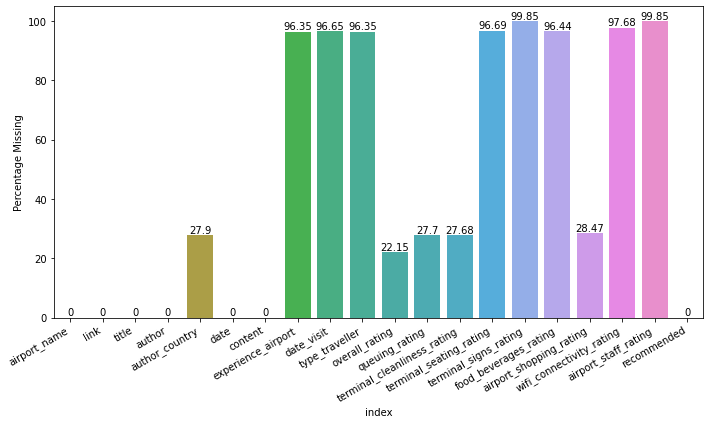

In [99]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="index", y="Percentage Missing", data = airport_missing)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30, horizontalalignment="right")
plt.tight_layout()

### 3. Remove unnecessary columns & high percentage of missing values

In [100]:
airport.columns

Index(['airport_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'experience_airport', 'date_visit', 'type_traveller',
       'overall_rating', 'queuing_rating', 'terminal_cleanliness_rating',
       'terminal_seating_rating', 'terminal_signs_rating',
       'food_beverages_rating', 'airport_shopping_rating',
       'wifi_connectivity_rating', 'airport_staff_rating', 'recommended'],
      dtype='object')

In [101]:
airport = airport.drop(columns = ['link', 'title', 'author', 'author_country', 'content', 'experience_airport', 'date_visit', 
                                  'type_traveller', 'terminal_seating_rating', 'terminal_signs_rating', 'food_beverages_rating', 
                                  'wifi_connectivity_rating', 'airport_staff_rating', ]
                )

### 4. Missing values

**Impute missing ratings with the mean value of each airport**

In [104]:
airport.columns

Index(['airport_name', 'date', 'overall_rating', 'queuing_rating',
       'terminal_cleanliness_rating', 'airport_shopping_rating',
       'recommended'],
      dtype='object')

In [105]:
for col in airport.columns[2:-1]:
    airport[col] = airport[col].fillna(airport.groupby('airport_name')[col].transform('mean'))
    

In [106]:
airport

,airport_name,date,overall_rating,queuing_rating,terminal_cleanliness_rating,airport_shopping_rating,recommended
0,aalborg-airport,2014-02-11,9.0,5.0,5.00,4.00,1
1,aalborg-airport,2013-02-13,9.0,5.0,4.00,4.00,1
2,aalborg-airport,2012-08-07,9.0,5.0,5.00,4.00,1
3,aalborg-airport,2011-05-22,5.0,5.0,5.00,3.00,0
4,aalborg-airport,2010-08-04,4.0,5.0,4.75,3.75,0
...,...,...,...,...,...,...,...
17716,zurich-airport,2009-07-30,3.0,5.0,5.00,5.00,0
17717,zurich-airport,2009-07-20,4.0,3.0,5.00,5.00,0
17718,zurich-airport,2009-07-15,3.0,3.0,5.00,3.00,0
17719,zurich-airport,2009-07-12,5.0,5.0,5.00,5.00,0


**Remove any row that still has missing values**

In [107]:
airport = airport.dropna(axis = 0)

In [108]:
airport

,airport_name,date,overall_rating,queuing_rating,terminal_cleanliness_rating,airport_shopping_rating,recommended
0,aalborg-airport,2014-02-11,9.0,5.0,5.00,4.00,1
1,aalborg-airport,2013-02-13,9.0,5.0,4.00,4.00,1
2,aalborg-airport,2012-08-07,9.0,5.0,5.00,4.00,1
3,aalborg-airport,2011-05-22,5.0,5.0,5.00,3.00,0
4,aalborg-airport,2010-08-04,4.0,5.0,4.75,3.75,0
...,...,...,...,...,...,...,...
17716,zurich-airport,2009-07-30,3.0,5.0,5.00,5.00,0
17717,zurich-airport,2009-07-20,4.0,3.0,5.00,5.00,0
17718,zurich-airport,2009-07-15,3.0,3.0,5.00,3.00,0
17719,zurich-airport,2009-07-12,5.0,5.0,5.00,5.00,0


### 5. Export to .csv

In [109]:
# airport.to_csv("skytrax_cleaned/airport_clean.csv", index=False)